# <center>Laboratorium 5<br>Metody Numeryczne</center>

Instrukcja:  
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.

***Materiały przygotowujące:***


In [13]:
import main
import numpy as np
import scipy
import matplotlib
import matplotlib.pyplot as plt

def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.
    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x)**i
    return y

def PolyCoefficients2(x, x0, coeffs):
    o = len(coeffs)
    y = 0
    for i in range(o):
        y += coeffs[i]*(x-x0)**i
    return y

***Zadanie 1.***  
Zaimplementuj interpolacje pierwszego stopnia. Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji liniowych w poszczególnych przedziałach.

***Podpowiedź***

poszczególne współczynniki przyjmują wartość:

$ a=\frac{y_{k+1}-y_k}{x_{k+1}-x_k}$

$ b=y-a*x_0$

***Przykład***


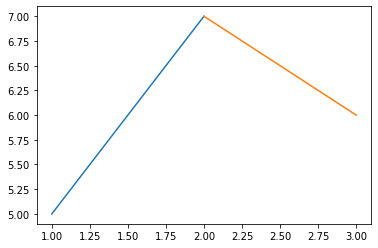

In [14]:
x=np.array([1,2,3])
y=np.array([5,7,6])

a,b=main.first_spline(x,y)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x)-1):
    x_new = np.linspace(x[i], x[i+1],1000)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))

***Zadanie 2.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jakość interpolacji splajnami 1-szego stopnia wynosi: 0.9615384615384616


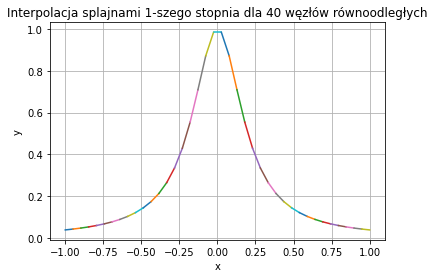

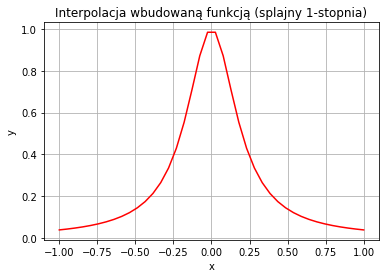

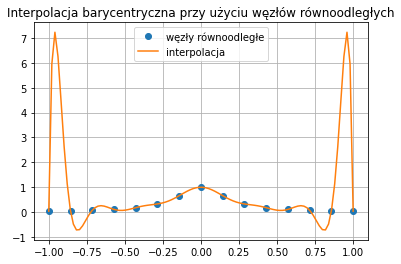

In [40]:
import main1
from scipy.interpolate import splprep, splev
from scipy.interpolate import barycentric_interpolate

f1 = lambda x: 1/(25*x**2 + 1)

N = 40 #Ilość węzłów równoodległych
X = np.linspace(-1, 1, N) #Węzły na przedziale <-1, 1>
y1 = f1(X) #Wartości węzłów

a, b = main.first_spline(X, y1)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(X)-1):
    x_new = np.linspace(X[i], X[i+1], N)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))
    plt.grid()
    plt.title(f'Interpolacja splajnami 1-szego stopnia dla {N} węzłów równoodległych')
    plt.xlabel('x'), plt.ylabel('y')
    
    
print(f'Jakość interpolacji splajnami 1-szego stopnia wynosi: {main1.L_inf(X, y1)}')

tck, u = splprep([X, y1], s=0)
new_points = splev(u, tck)
fig, ax = plt.subplots()
ax.plot(new_points[0], new_points[1], 'r-')
plt.title(f'Interpolacja wbudowaną funkcją (splajny 1-stopnia)')
plt.xlabel('x'), plt.ylabel('y')
plt.grid()
plt.show()


N1 = 15 #Ilość węzłów równoodległych
X_3 = np.linspace(-1, 1, N1) #Węzły na przedziale <-1, 1>
y_3 = f1(X_3)
x = np.linspace(min(X_3), max(X_3), num=100)

y_wykres = barycentric_interpolate(X_3, y_3, x)
plt.plot(X_3, y_3, "o", label="węzły równoodległe")
plt.plot(x, y_wykres, label="interpolacja")
plt.legend()
plt.title('Interpolacja barycentryczna przy użyciu węzłów równoodległych')
plt.grid()
plt.show()

Wnioski:
Jak możemy zauważyć dla przeprowadzonej interpolacji barycentrycznej z węzłami równoodległymi wystąpił efekt Rungego. 
Funkcja na końcu swoich przedziałów dość znacząco odbiega od normy.

***Zadanie 3.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 1 oraz interpolacji barycentrycznej z węzłami równoodległymi (korzystając z kodu z poprzedniego zadania) dokonaj interpolacji funkcji: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jakość interpolacji splajnami 1-szego stopnia wynosi: 0.5183606404969032


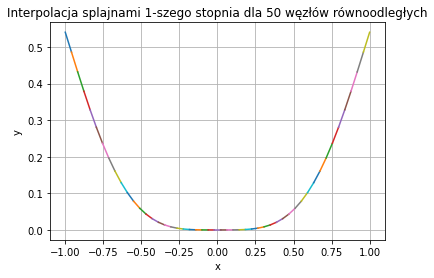

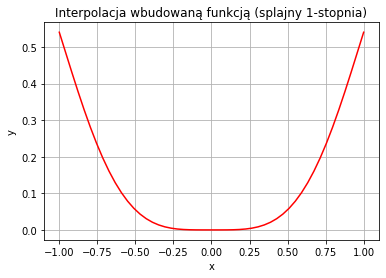

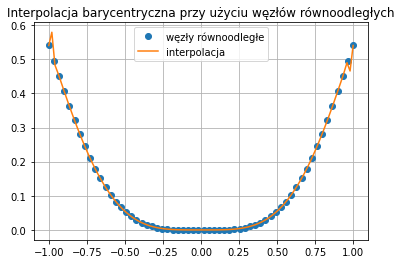

In [39]:
f2 = lambda x: np.cos(x)*x**4 

N = 50 #Ilość węzłów równoodległych
x1 = np.linspace(-1, 1, N) #Węzły na przedziale <-1, 1>
y1 = f2(x1) #Wartości węzłów 

a, b = main.first_spline(x1, y1)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(x1)-1):
    x_new = np.linspace(x1[i], x1[i+1], N)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))
    plt.grid()
    plt.title(f'Interpolacja splajnami 1-szego stopnia dla {N} węzłów równoodległych')
    plt.xlabel('x'), plt.ylabel('y')
    
print(f'Jakość interpolacji splajnami 1-szego stopnia wynosi: {main1.L_inf(x1, y1)}')

tck, u = splprep([x1, y1], s=0)
new_points = splev(u, tck)
fig, ax = plt.subplots()
ax.plot(new_points[0], new_points[1], 'r-')
plt.title(f'Interpolacja wbudowaną funkcją (splajny 1-stopnia)')
plt.grid()
plt.xlabel('x'), plt.ylabel('y')
plt.show()


N1 = 60 #Ilość węzłów równoodległych
X_4 = np.linspace(-1, 1, N1) #Węzły na przedziale <-1, 1>
y_4 = f2(X_4)
x1 = np.linspace(min(X_4), max(X_4), num=100)

y_wykres1 = barycentric_interpolate(X_4, y_4, x1)

plt.plot(X_4, y_4, "o", label="węzły równoodległe")
plt.plot(x1, y_wykres1, label="interpolacja")
plt.legend()
plt.title('Interpolacja barycentryczna przy użyciu węzłów równoodległych')
plt.grid()
plt.show()

Wnioski: 
Dla funkcji f2 przy interpolacji barycentrycznej z węzłami równoodległymi również występuję efekt Rungego, jednak dopiero od większej liczby węzłów. Znaczącę zmiany na bokach przedziałów możemy zauważyć od około N >= 60.

***Zadanie 4.***  
Zaimplementuj funkcję interpolującą sklejaną trzeciego rzędu (splajn kubiczny). Jako dane wejściowe dane są dwa wektory: argumentów oraz wartości funkcji. Funkcja ma zwracać współczynniki funkcji wielomianowych w poszczególnych przedziałach.

***Podpowiedź***

https://medium.com/eatpredlove/natural-cubic-splines-implementation-with-python-edf68feb57aa



***Zadania 5.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = \frac{1}{25x^2+1}$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  1.1801832636420706e-15


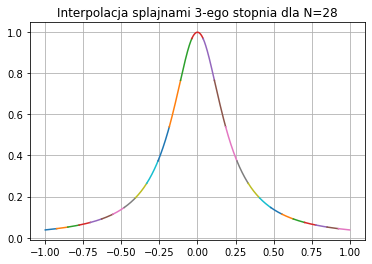

In [29]:
f1 = lambda x: 1/(25*x**2 + 1)

N = 28 #Ilość węzłów równoodległych
x11 = np.linspace(-1, 1, N) #Węzły na przedziale <-1, 1>
y11 = f1(x11) #Wartości węzłów 

b, c, d = main.cubic_spline(x11, y11) #odpowiednio współcznniki 1,2 i 3 stopnia
f = [[y11[i], b[i],c[i], d[i]] for i in range(len(b))]

for i in range(len(x11)-1):
    x_new = np.linspace(x11[i], x11[i+1], 1000)
    plt.plot(x_new, PolyCoefficients2(x_new, x11[i], f[i]))
    plt.grid()
    plt.title(f'Interpolacja splajnami 3-ego stopnia dla N={N}')

In [28]:
print(f'Jakość interpolacji wynosi: {main1.L_inf(x11, y11)}')

Jakość interpolacji wynosi: 0.9615384615384616


***Zadanie 6.***  
Korzystając z funkcji z pakietu [scipy.interpolate.splprep](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.splprep.html#scipy.interpolate.splprep), funkcji zaimplementowanej w Zadaniu 4: 
    
### $ f(x) = cos(x)x^4$

W przedziale \[-1, 1\]

Dokonaj porównania wyników otrzymanych:  
Wykorzystując funkcję z ubiegłego tygodnia, ocenić jakość interpolacji funkcji spline pierwszego stopnia z wartościami danej funkcji.


Jacobi Method Output:
Number of Iterations:  52
Norm of Difference:  0.0


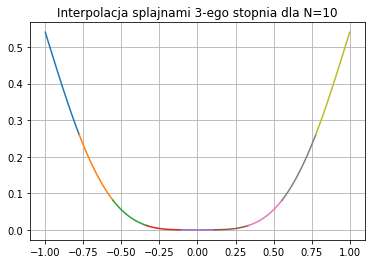

In [30]:
f2 = lambda x: np.cos(x)*x**4

N = 10 #Ilość węzłów równoodległych
x1 = np.linspace(-1, 1, N) #Węzły na przedziale <-1, 1>
y1 = f2(x1) #Wartości węzłów 

b, c, d = main.cubic_spline(x1, y1) #odpowiednio współcznniki 1,2 i 3 stopnia
f = [[y1[i], b[i], c[i], d[i]] for i in range(len(b))]

for i in range(len(x1)-1):
    x_new = np.linspace(x1[i], x1[i+1], N)
    plt.plot(x_new, PolyCoefficients2(x_new, x1[i], f[i]))
    plt.grid()
    plt.title(f'Interpolacja splajnami 3-ego stopnia dla N={N}')

In [25]:
print(f'Jakość interpolacji wynosi: {main1.L_inf(x1, y1)}')

Jakość interpolacji wynosi: 0.5170474663135584


***Zadanie 7.***  
Dla funkcji:
### $f(x) = |sin(5x)|^3$

Porównać działanie funkcji zaimplementowanych w Zadaniu 1 oraz 4 oraz przedstawić wyniki na odpowiednich wykresach.

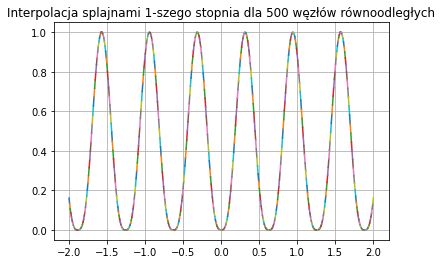

In [32]:
f3 = lambda x: (np.abs(np.sin(5*x))) ** 3 

N = 500 #Ilość węzłów równoodległych
X = np.linspace(-2, 2, N) #Węzły na przedziale <-1, 1>
y1 = f3(X) #Wartości węzłów

a, b = main.first_spline(X, y1)
f = [[b[i],a[i]] for i in range(len(a))]

for i in range(len(X)-1):
    x_new = np.linspace(X[i], X[i+1], N)
    plt.plot(x_new, PolyCoefficients(x_new, f[i]))
    plt.grid()
    plt.title(f'Interpolacja splajnami 1-szego stopnia dla {N} węzłów równoodległych')


Jacobi Method Output:
Number of Iterations:  1000
Norm of Difference:  3.64241569929892e-14


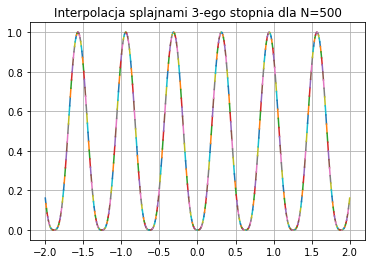

In [33]:
b, c, d = main.cubic_spline(X, y1) #odpowiednio współcznniki 1,2 i 3 stopnia
f = [[y1[i], b[i], c[i], d[i]] for i in range(len(b))]

for i in range(len(X)-1):
    x_new = np.linspace(X[i], X[i+1], N)
    plt.plot(x_new, PolyCoefficients2(x_new, X[i], f[i]))
    plt.grid()
    plt.title(f'Interpolacja splajnami 3-ego stopnia dla N={N}')